In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
dataset = pd.read_csv('clustering_data.csv')
x = dataset.iloc[:,1:14].values

In [18]:
display(x)

array([[1.372e+01, 1.430e+00, 2.500e+00, ..., 8.900e-01, 2.870e+00,
        1.285e+03],
       [1.394e+01, 1.730e+00, 2.270e+00, ..., 1.120e+00, 3.100e+00,
        1.260e+03],
       [1.220e+01, 3.030e+00, 2.320e+00, ..., 6.600e-01, 1.830e+00,
        5.100e+02],
       ...,
       [1.308e+01, 3.900e+00, 2.360e+00, ..., 5.700e-01, 1.330e+00,
        5.500e+02],
       [1.288e+01, 2.990e+00, 2.400e+00, ..., 7.400e-01, 1.420e+00,
        5.300e+02],
       [1.371e+01, 5.650e+00, 2.450e+00, ..., 6.400e-01, 1.740e+00,
        7.400e+02]])

In [3]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x_scaled=sc.transform(x)

In [19]:
print(x_scaled)

[[ 0.88862741 -0.81359548  0.4879264  ... -0.29592353  0.36485461
   1.71359755]
 [ 1.1603857  -0.54429654 -0.352802   ...  0.71316437  0.68971646
   1.63398521]
 [-0.98897534  0.62266555 -0.17003496 ... -1.30501144 -1.10408592
  -0.7543851 ]
 ...
 [ 0.09805783  1.40363249 -0.02382132 ... -1.69987192 -1.81030733
  -0.62700535]
 [-0.14899516  0.58675903  0.12239231 ... -0.95402434 -1.68318747
  -0.69069522]
 [ 0.87627476  2.974543    0.30515936 ... -1.39275821 -1.23120577
  -0.02195154]]


In [4]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(x_scaled)
x_pca=pca.transform(x_scaled)

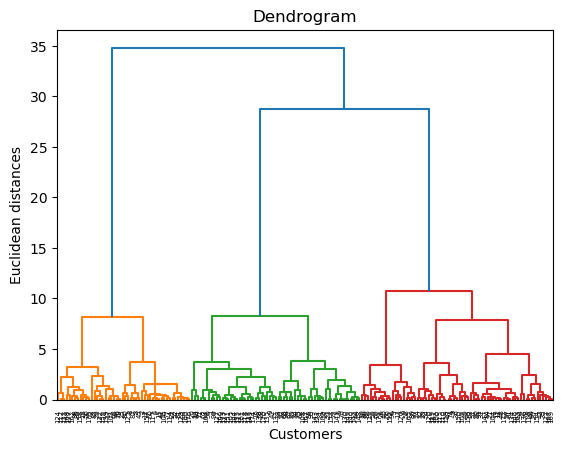

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x_pca)

In [8]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x_pca, hc.labels_)
print(score)

0.5590883962040384


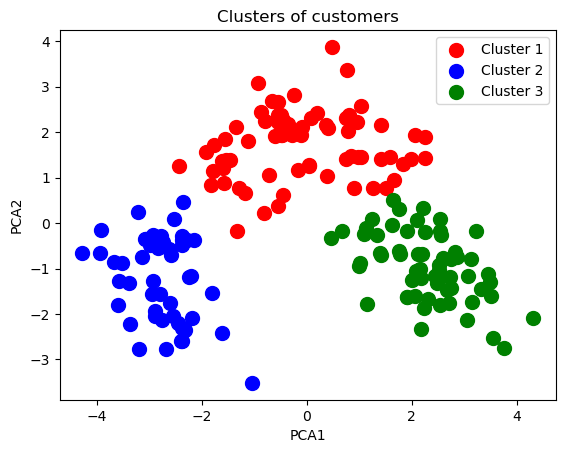

In [12]:
plt.scatter(x_pca[y_hc == 0, 0], x_pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_pca[y_hc == 1, 0], x_pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_pca[y_hc == 2, 0], x_pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()